In [1]:
import requests
import pandas as pd

def fetch_price_data(crypto_id, vs_currency='usd', days=365):
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart"
    params = {
        'vs_currency': vs_currency,
        'days': days
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # Check if the 'prices' key is in the response
    if 'prices' not in data:
        print(f"Error: 'prices' key not found in the response for {crypto_id}")
        print("Response:", data)
        return None
    
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Fetch price data for Bitcoin
btc_prices = fetch_price_data('bitcoin')

if btc_prices is not None:
    btc_prices.to_csv('btc_prices.csv', index=False)
    print("Bitcoin price data saved as btc_prices.csv")
else:
    print("Failed to fetch Bitcoin price data.")


Bitcoin price data saved as btc_prices.csv


In [2]:
# Fetch price data for Ethereum
eth_prices = fetch_price_data('ethereum')

if eth_prices is not None:
    eth_prices.to_csv('eth_prices.csv', index=False)
    print("Ethereum price data saved as eth_prices.csv")
else:
    print("Failed to fetch Ethereum price data.")


Ethereum price data saved as eth_prices.csv


In [3]:
# Fetch price data for Litecoin
ltc_prices = fetch_price_data('litecoin')

if ltc_prices is not None:
    ltc_prices.to_csv('ltc_prices.csv', index=False)
    print("Litecoin price data saved as ltc_prices.csv")
else:
    print("Failed to fetch Litecoin price data.")


Litecoin price data saved as ltc_prices.csv


In [4]:
import pandas as pd

# Load the data
btc_prices = pd.read_csv('btc_prices.csv')
eth_prices = pd.read_csv('eth_prices.csv')
ltc_prices = pd.read_csv('ltc_prices.csv')

# Ensure the timestamp is in datetime format
btc_prices['timestamp'] = pd.to_datetime(btc_prices['timestamp'])
eth_prices['timestamp'] = pd.to_datetime(eth_prices['timestamp'])
ltc_prices['timestamp'] = pd.to_datetime(ltc_prices['timestamp'])

# Set the timestamp as the index
btc_prices.set_index('timestamp', inplace=True)
eth_prices.set_index('timestamp', inplace=True)
ltc_prices.set_index('timestamp', inplace=True)

# Display the first few rows to verify
print("Bitcoin Prices:")
print(btc_prices.head())
print("\nEthereum Prices:")
print(eth_prices.head())
print("\nLitecoin Prices:")
print(ltc_prices.head())


Bitcoin Prices:
                   price
timestamp               
2023-05-25  26338.948947
2023-05-26  26475.607903
2023-05-27  26717.987554
2023-05-28  26848.239940
2023-05-29  28110.313468

Ethereum Prices:
                  price
timestamp              
2023-05-25  1800.736010
2023-05-26  1805.805760
2023-05-27  1828.956537
2023-05-28  1830.306651
2023-05-29  1913.816249

Litecoin Prices:
                price
timestamp            
2023-05-25  85.992431
2023-05-26  86.521451
2023-05-27  87.221433
2023-05-28  88.570757
2023-05-29  91.556588


In [5]:
# Calculate daily returns
btc_returns = btc_prices['price'].pct_change().dropna()
eth_returns = eth_prices['price'].pct_change().dropna()
ltc_returns = ltc_prices['price'].pct_change().dropna()

# Display the first few rows of the returns to verify
print("Bitcoin Daily Returns:")
print(btc_returns.head())
print("\nEthereum Daily Returns:")
print(eth_returns.head())
print("\nLitecoin Daily Returns:")
print(ltc_returns.head())


Bitcoin Daily Returns:
timestamp
2023-05-26    0.005188
2023-05-27    0.009155
2023-05-28    0.004875
2023-05-29    0.047008
2023-05-30   -0.012471
Name: price, dtype: float64

Ethereum Daily Returns:
timestamp
2023-05-26    0.002815
2023-05-27    0.012820
2023-05-28    0.000738
2023-05-29    0.045626
2023-05-30   -0.010504
Name: price, dtype: float64

Litecoin Daily Returns:
timestamp
2023-05-26    0.006152
2023-05-27    0.008090
2023-05-28    0.015470
2023-05-29    0.033711
2023-05-30   -0.006510
Name: price, dtype: float64


In [6]:
# Combine the returns data into a single DataFrame
returns_df = pd.DataFrame({
    'bitcoin': btc_returns,
    'ethereum': eth_returns,
    'litecoin': ltc_returns
})

# Display the first few rows of the combined returns DataFrame to verify
print("Combined Daily Returns:")
print(returns_df.head())


Combined Daily Returns:
             bitcoin  ethereum  litecoin
timestamp                               
2023-05-26  0.005188  0.002815  0.006152
2023-05-27  0.009155  0.012820  0.008090
2023-05-28  0.004875  0.000738  0.015470
2023-05-29  0.047008  0.045626  0.033711
2023-05-30 -0.012471 -0.010504 -0.006510


In [7]:
# Define the portfolio allocations
allocations = {'bitcoin': 0.5, 'ethereum': 0.3, 'litecoin': 0.2}

# Convert allocations to a pandas Series
allocations_series = pd.Series(allocations)

# Display the allocations to verify
print("Portfolio Allocations:")
print(allocations_series)


Portfolio Allocations:
bitcoin     0.5
ethereum    0.3
litecoin    0.2
dtype: float64


In [8]:
# Calculate portfolio daily returns
portfolio_returns = returns_df.dot(allocations_series)

# Display the first few rows of the portfolio returns to verify
print("Portfolio Daily Returns:")
print(portfolio_returns.head())


Portfolio Daily Returns:
timestamp
2023-05-26    0.004669
2023-05-27    0.010042
2023-05-28    0.005753
2023-05-29    0.043934
2023-05-30   -0.010689
dtype: float64


In [9]:
# Calculate portfolio cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Display the first few rows of the cumulative returns to verify
print("Portfolio Cumulative Returns:")
print(cumulative_returns.head())


Portfolio Cumulative Returns:
timestamp
2023-05-26    1.004669
2023-05-27    1.014758
2023-05-28    1.020596
2023-05-29    1.065434
2023-05-30    1.054046
dtype: float64


In [10]:
# Calculate portfolio metrics

# Annualize the daily returns
annualized_returns = portfolio_returns.mean() * 252

# Annualize the daily volatility
annualized_volatility = portfolio_returns.std() * (252 ** 0.5)

# Calculate the Sharpe ratio (assuming a risk-free rate of 0)
sharpe_ratio = annualized_returns / annualized_volatility

# Display the portfolio metrics
print("Portfolio Metrics:")
print(f"Annualized Returns: {annualized_returns:.2f}")
print(f"Annualized Volatility: {annualized_volatility:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Portfolio Metrics:
Annualized Returns: 0.60
Annualized Volatility: 0.40
Sharpe Ratio: 1.52


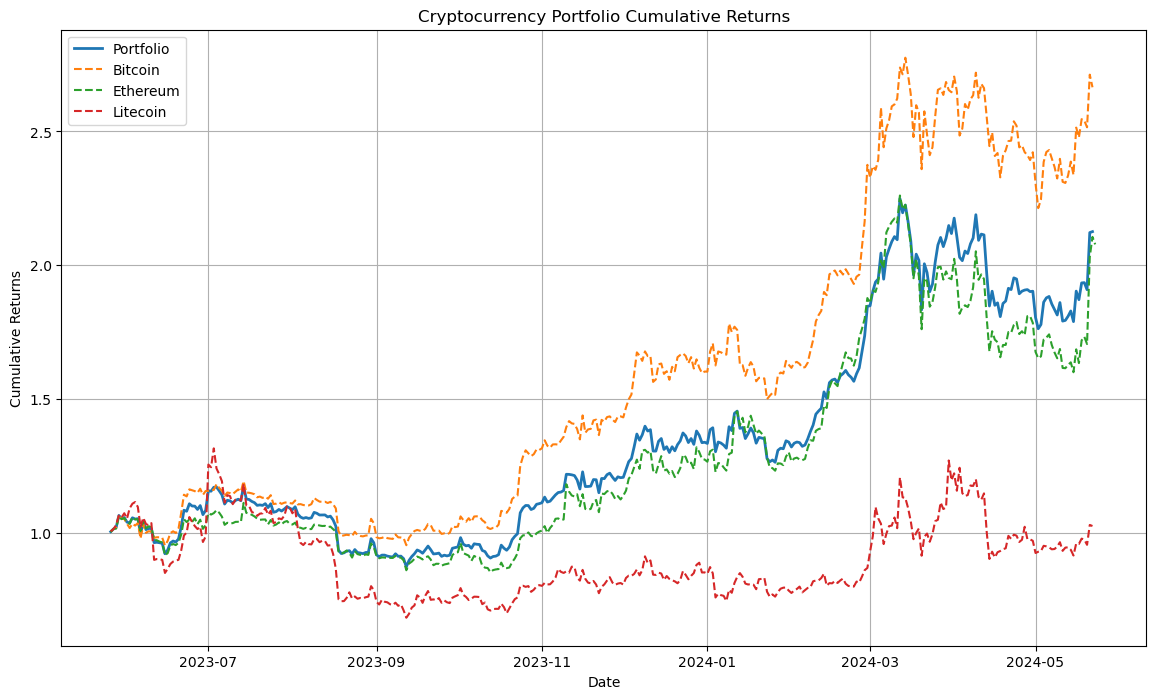

In [11]:
import matplotlib.pyplot as plt

# Calculate cumulative returns for individual cryptocurrencies
btc_cumulative_returns = (1 + returns_df['bitcoin']).cumprod()
eth_cumulative_returns = (1 + returns_df['ethereum']).cumprod()
ltc_cumulative_returns = (1 + returns_df['litecoin']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 8))
plt.plot(cumulative_returns, label='Portfolio', linewidth=2)
plt.plot(btc_cumulative_returns, label='Bitcoin', linestyle='--')
plt.plot(eth_cumulative_returns, label='Ethereum', linestyle='--')
plt.plot(ltc_cumulative_returns, label='Litecoin', linestyle='--')
plt.title('Cryptocurrency Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


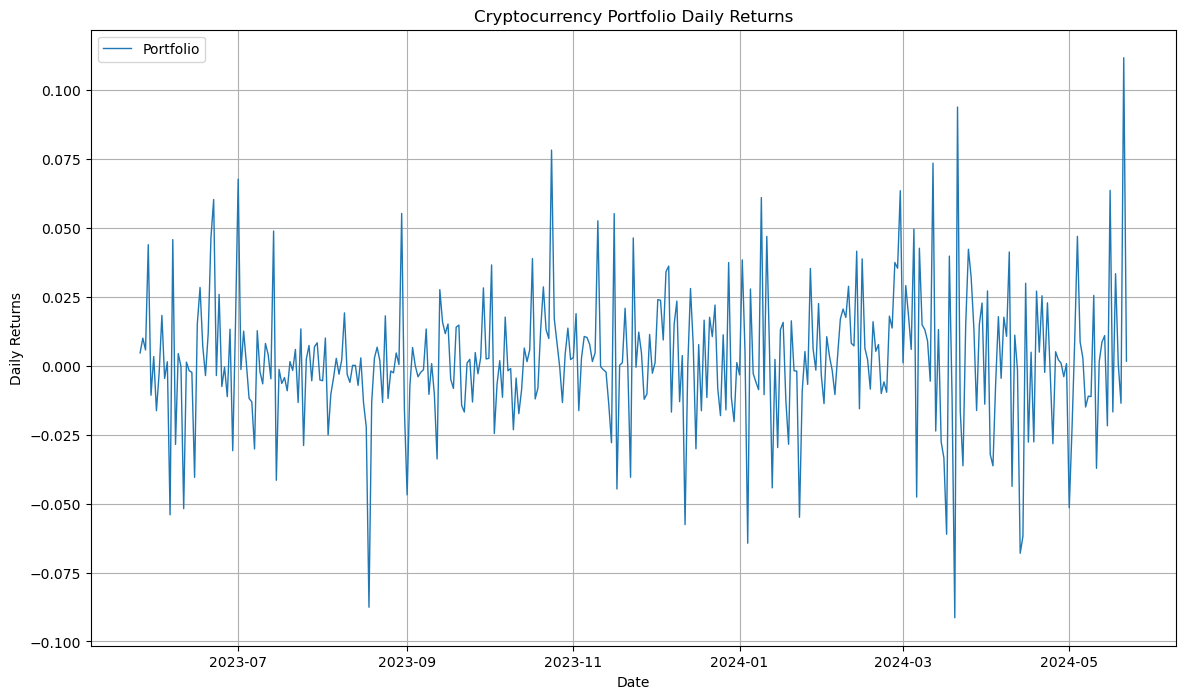

In [12]:
# Plot the daily returns
plt.figure(figsize=(14, 8))
plt.plot(portfolio_returns, label='Portfolio', linewidth=1)
plt.title('Cryptocurrency Portfolio Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()


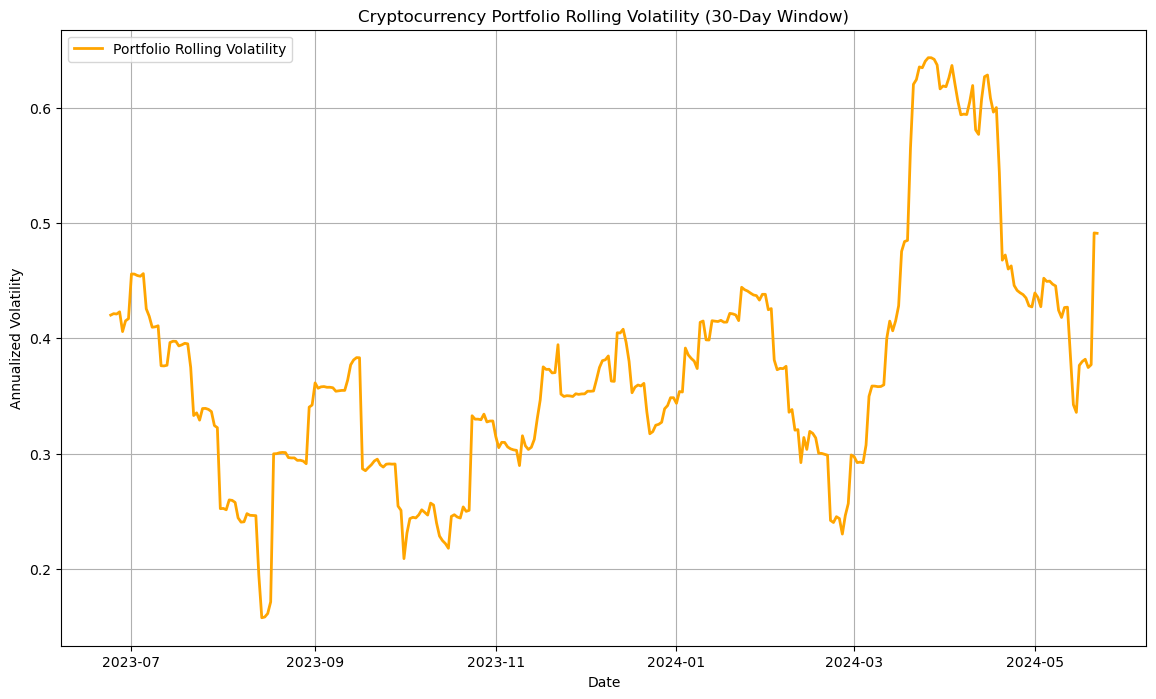

In [13]:
# Calculate rolling volatility
rolling_volatility = portfolio_returns.rolling(window=30).std() * (252 ** 0.5)

# Plot the rolling volatility
plt.figure(figsize=(14, 8))
plt.plot(rolling_volatility, label='Portfolio Rolling Volatility', linewidth=2, color='orange')
plt.title('Cryptocurrency Portfolio Rolling Volatility (30-Day Window)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.show()


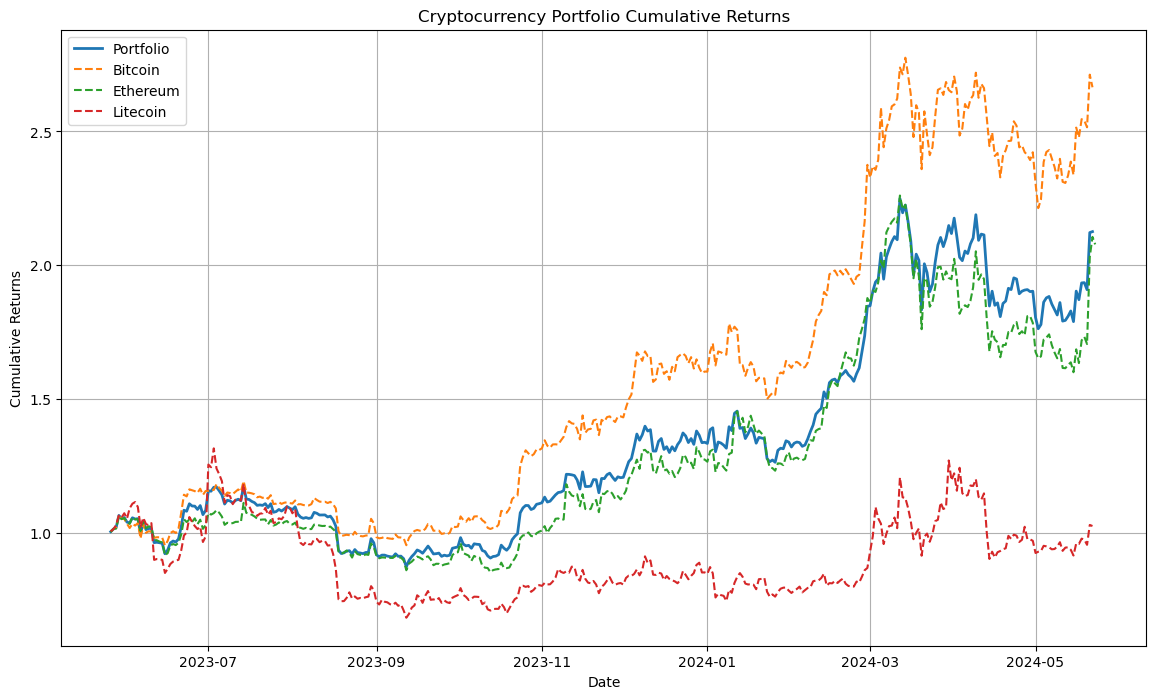

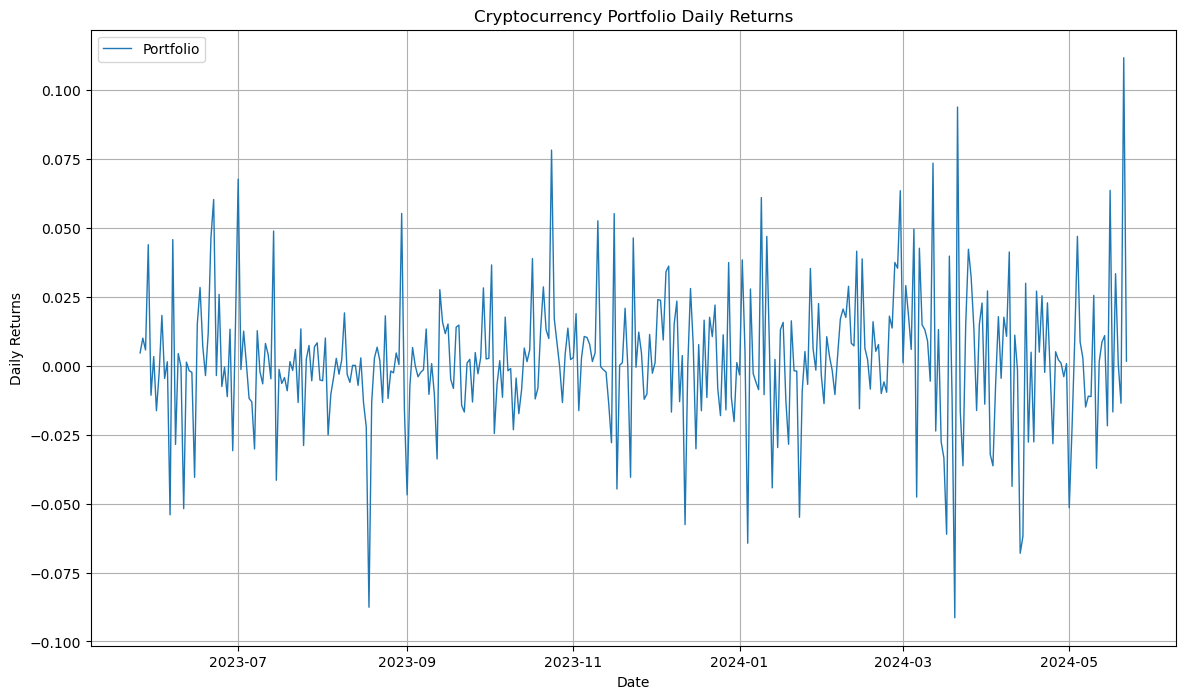

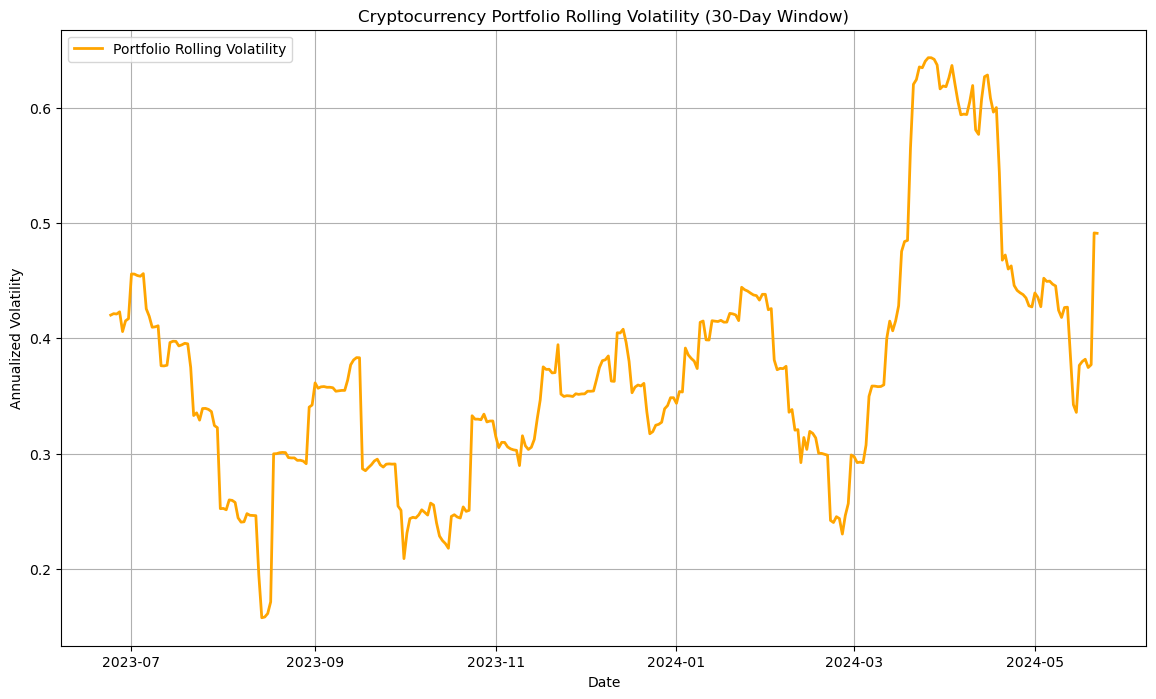

In [14]:
# Save the cumulative returns plot
plt.figure(figsize=(14, 8))
plt.plot(cumulative_returns, label='Portfolio', linewidth=2)
plt.plot(btc_cumulative_returns, label='Bitcoin', linestyle='--')
plt.plot(eth_cumulative_returns, label='Ethereum', linestyle='--')
plt.plot(ltc_cumulative_returns, label='Litecoin', linestyle='--')
plt.title('Cryptocurrency Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig('cumulative_returns.png')

# Save the daily returns plot
plt.figure(figsize=(14, 8))
plt.plot(portfolio_returns, label='Portfolio', linewidth=1)
plt.title('Cryptocurrency Portfolio Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.savefig('daily_returns.png')

# Save the rolling volatility plot
plt.figure(figsize=(14, 8))
plt.plot(rolling_volatility, label='Portfolio Rolling Volatility', linewidth=2, color='orange')
plt.title('Cryptocurrency Portfolio Rolling Volatility (30-Day Window)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.savefig('rolling_volatility.png')


In [15]:
# Save key metrics to a text file
with open('portfolio_metrics.txt', 'w') as f:
    f.write("Portfolio Metrics:\n")
    f.write(f"Annualized Returns: {annualized_returns:.2f}\n")
    f.write(f"Annualized Volatility: {annualized_volatility:.2f}\n")
    f.write(f"Sharpe Ratio: {sharpe_ratio:.2f}\n")


In [ ]:
M